In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.4MB/s]


In [ ]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [ ]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
data.batting_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data.bowling_team.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [ ]:
data2.team1.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.team2.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [ ]:
data2.toss_winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)
data2.winner.replace({'Bangalore Royal Challengers' : 'Royal Challengers Bangalore'},inplace=True)

In [ ]:
data_f = data2.loc[data2.team1.isin(['Kolkata Knight Riders','Royal Challengers Bangalore'])] 
data_f = data_f.loc[data_f.team2.isin(['Kolkata Knight Riders','Royal Challengers Bangalore'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
44,45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium,AY Dandekar,C Shamshuddin,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
87,88,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN
133,134,2009,Durban,2009-04-29,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Kingsmead,MR Benson,TH Wijewardene,NaN
155,156,2009,Centurion,2009-05-12,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,LRPL Taylor,SuperSport Park,M Erasmus,SS Hazare,NaN
177,178,2010,Kolkata,2010-03-14,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,MK Tiwary,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
216,217,2010,Bangalore,2010-04-10,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,R Vinay Kumar,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
257,258,2011,Kolkata,2011-04-22,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
290,291,2011,Bangalore,2011-05-14,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN


Finally , We have got a complete dataset for all the matches of  KKR VS RCB

**Let's do Q1 now**

KKR Wins - 14
RCB Wins - 10


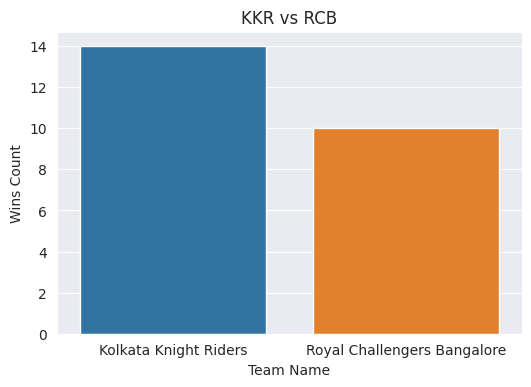

In [ ]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KKR vs RCB')
A,B =data_f.winner.value_counts()

print('KKR Wins -',A)
print('RCB Wins -',B)

plt.show()


Let's mark KKR considering overall analysis

**Let's do Q2 now**

**Average Wickets lost by RCB in 5-20 overs**

In [ ]:
data_n = data.loc[data.bowling_team.isin(['Kolkata Knight Riders'])]
data_n = data_n.loc[data.batting_team.isin(['Royal Challengers Bangalore'])]
data_n = data_n.loc[(data_n.over >=5) & (data_n.over<=20)]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6402,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,1,KM Jadhav,CH Gayle,NM Coulter-Nile,0,0,0,0,0,0,0,0,0,KM Jadhav,caught,CR Woakes
6403,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,2,STR Binny,CH Gayle,NM Coulter-Nile,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6404,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,3,STR Binny,CH Gayle,NM Coulter-Nile,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6405,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,4,STR Binny,CH Gayle,NM Coulter-Nile,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6406,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,5,STR Binny,CH Gayle,NM Coulter-Nile,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173125,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,2,MP Stoinis,V Kohli,H Gurney,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
173126,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,3,MP Stoinis,V Kohli,H Gurney,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
173127,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,4,MP Stoinis,V Kohli,H Gurney,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
173128,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,5,V Kohli,MP Stoinis,H Gurney,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
data_n.player_dismissed.value_counts().sum() # RCB's wickets v KKR in 5-20 overs

108

In [ ]:
data_n.match_id.nunique() # KKR v RCB matches

24

In [ ]:
np.round(108/24,2) # Average wicket lost by RCB v KKR in 5-20 overs

4.5

Let's mark more than 4 considering our analysis.

**For Q3, ABD's balls taken to score 30 runs v KKR**

In [ ]:
data_c = data.loc[data.bowling_team.isin(['Kolkata Knight Riders'])]
data_c = data_c.loc[data.batting_team.isin(['Royal Challengers Bangalore'])]
data_c = data_c.loc[data.batsman.isin(['AB de Villiers'])]
data_c

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6384,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,3,AB de Villiers,CH Gayle,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6385,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,4,AB de Villiers,CH Gayle,UT Yadav,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
6386,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,5,AB de Villiers,CH Gayle,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6387,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,6,AB de Villiers,CH Gayle,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6389,27,2,Royal Challengers Bangalore,Kolkata Knight Riders,3,2,AB de Villiers,CH Gayle,NM Coulter-Nile,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168767,11153,1,Royal Challengers Bangalore,Kolkata Knight Riders,16,6,AB de Villiers,V Kohli,P Krishna,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
168773,11153,1,Royal Challengers Bangalore,Kolkata Knight Riders,17,6,AB de Villiers,V Kohli,L Ferguson,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
168783,11153,1,Royal Challengers Bangalore,Kolkata Knight Riders,19,4,AB de Villiers,MP Stoinis,SP Narine,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
168784,11153,1,Royal Challengers Bangalore,Kolkata Knight Riders,19,5,AB de Villiers,MP Stoinis,SP Narine,0,1,0,0,0,0,1,1,2,NaN,NaN,NaN


In [ ]:
data_abd = data_c.groupby('match_id').apply(lambda data_c:np.sum(data_c['batsman_runs'])).reset_index(name='ABD Runs per match')
data_abd

,match_id,ABD Runs per match
0,27,8
1,45,10
2,291,13
3,317,10
4,344,0
5,392,22
6,441,28
7,468,11
8,506,13
9,522,28


In [ ]:
data_abd2= data_c.groupby('match_id').apply(lambda data_c:np.sum(data_c.over.value_counts())).reset_index(name='Ball faced')
data_abd2

,match_id,Ball faced
0,27,6
1,45,8
2,291,14
3,317,10
4,344,1
5,392,22
6,441,22
7,468,12
8,506,13
9,522,13


In [ ]:
data_abd.join(data_abd2['Ball faced']) # Finally we got a Desired dataframe

,match_id,ABD Runs per match,Ball faced
0,27,8,6
1,45,10,8
2,291,13,14
3,317,10,10
4,344,0,1
5,392,22,22
6,441,28,22
7,468,11,12
8,506,13,13
9,522,28,13


As we can observe out of 15 innings only 3 times ABD has scored 30+ runs.

Therefore, Let's mark he won't score 30 runs.

**Let's do Q4**

**Let's find Morgan's strike rate v RCB overall and in lst 7 balls**

In [ ]:
data_m = data.loc[data.bowling_team.isin(['Royal Challengers Bangalore'])]
data_m = data_m.loc[data.batsman.isin(['EJG Morgan'])]

In [ ]:
data_em = data_m.groupby('match_id').apply(lambda data_m:np.sum(data_m['batsman_runs'])).reset_index(name='Morgan Runs per match v RCB')
data_em

,match_id,Morgan Runs per match v RCB
0,258,6
1,291,2
2,392,2
3,568,11
4,580,22


In [ ]:
data_em2= data_m.groupby('match_id').apply(lambda data_m:np.sum(data_m.over.value_counts())).reset_index(name='Ball faced')
data_em2

,match_id,Ball faced
0,258,6
1,291,5
2,392,5
3,568,7
4,580,18


In [ ]:
data_em.join(data_em2['Ball faced']) # Desired Dataframe

,match_id,Morgan Runs per match v RCB,Ball faced
0,258,6,6
1,291,2,5
2,392,2,5
3,568,11,7
4,580,22,18


As we can observe only 3 times Morgan has faced 7 + plus v RCB.
Let's find answers with these only

In [ ]:
# Strike rate when Morgan faced more than 7 balls
np.round(33/25*100,2) 

132.0

In [ ]:
# Strike rate when Morgan faced less than 7 balls
np.round(10/16*100,2)

62.5

In [ ]:
132-62.5

69.5

Therefore, mark there less than 75

**Let's do Q5 now**

**Let's find RCB runs in death i.e 15-20 overs v KKR**

In [ ]:
data_r = data.loc[data.bowling_team.isin(['Kolkata Knight Riders'])]
data_r = data_r.loc[data.batting_team.isin(['Royal Challengers Bangalore'])]
data_r = data_r.loc[(data_r.over >=15) & (data_r.over<=20)]
data_r

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10492,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,15,1,Mandeep Singh,TM Head,C de Grandhomme,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
10493,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,15,2,Mandeep Singh,TM Head,C de Grandhomme,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
10494,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,15,3,Mandeep Singh,TM Head,C de Grandhomme,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
10495,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,15,4,TM Head,Mandeep Singh,C de Grandhomme,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
10496,45,1,Royal Challengers Bangalore,Kolkata Knight Riders,15,5,Mandeep Singh,TM Head,C de Grandhomme,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173125,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,2,MP Stoinis,V Kohli,H Gurney,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
173126,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,3,MP Stoinis,V Kohli,H Gurney,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
173127,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,4,MP Stoinis,V Kohli,H Gurney,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
173128,11326,1,Royal Challengers Bangalore,Kolkata Knight Riders,20,5,V Kohli,MP Stoinis,H Gurney,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
data_r.total_runs.sum()

1171

In [ ]:
data_r.match_id.nunique()

21

In [ ]:
np.round(1171/21,2) # Average RCB runs in Death v KKR

55.76

Let's mark 46-60 considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

